In [108]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


**Libraries**

Amount of required libraries

In [109]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


**Load Data**

We will load the supplied data necessary for the analysis. 

In [110]:
calendar = pd.read_csv('/kaggle/input/seattle/calendar.csv')
rws = pd.read_csv('/kaggle/input/seattle/reviews.csv')
lis = pd.read_csv('/kaggle/input/seattle/listings.csv')


**Data preparation**

in this step we will clean the data to answer the first question. Which neighborhoods are most popular among Airbnb renters?

In [111]:
lis[['id', 'neighbourhood', 'property_type', 'price', 'review_scores_value']].head()


,id,neighbourhood,property_type,price,review_scores_value
0,241032,Queen Anne,Apartment,$85.00,10.0
1,953595,Queen Anne,Apartment,$150.00,10.0
2,3308979,Queen Anne,House,$975.00,10.0
3,7421966,Queen Anne,Apartment,$100.00,NaN
4,278830,Queen Anne,House,$450.00,9.0


**1. Top 8 most popular neighborhoods for Airbnb in Seattle**

we will find the 8 most popular neighborhoods in the Airbnb data by number of customers booking, counting and organizing them in descending order, finally we will show the result in a bar chart.

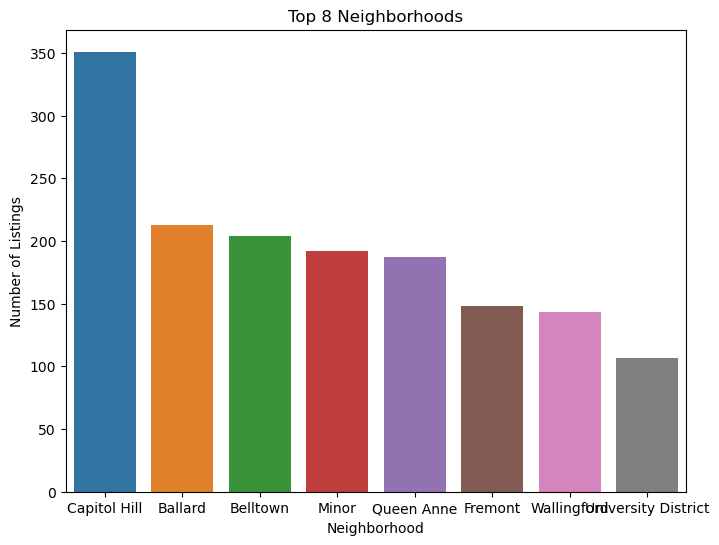

Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
Name: neighbourhood, dtype: int64

In [112]:

lis = lis[~lis['neighbourhood'].isnull()]
top_neighborhoods = lis['neighbourhood'].value_counts().nlargest(8)
plt.figure(figsize=(8,6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values)
plt.title('Top 8 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.show()
top_neighborhoods

**Results**

We found that capitol hill and ballars are the most popular neighborhoods to rent an airbnb in seattle with a number of bookings of 351 and 213 respectively.


**2. What are the average prices for different types of properties**

we will find the average lease price by type of property. 

In [120]:
lis['price'] = lis['price'].replace(',', '').replace('$', '').astype(float)
avg=lis['price'].mean()
avg

127.97616553169199

In [121]:

avg_price=lis.groupby(['property_type'])['price'].mean().sort_values(ascending=False)
avg_price


property_type
Boat               282.375000
Condominium        151.109890
Loft               135.700000
House              132.351414
Townhouse          129.457627
Apartment          122.932670
Camper/RV          120.461538
Bungalow           115.615385
Bed & Breakfast    112.054054
Cabin              104.666667
Treehouse          101.000000
Yurt               100.000000
Chalet              98.500000
Other               94.681818
Tent                54.000000
Dorm                39.500000
Name: price, dtype: float64

**Results**

we found that the highest average rental price is for boats with an average value of 221.6.
We also found that only 4 of the property types exceed the average rental price. 

**3. How does the time of the year impact the rental prices?**

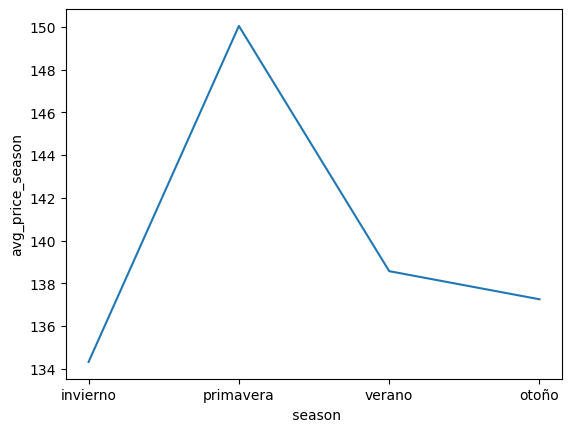

In [130]:
calendar['price'] = calendar['price'].replace(',', '').replace('$', '').astype(float)

# Convert date column to date objects
calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')

#Create a new column in the Data for the season of the year
calendar['season'] = pd.cut(calendar['date'].dt.month, [ 2, 5, 8, 11, 12], labels=['invierno', 'primavera', 'verano', 'otoño'])

# Group the data by season of the year and calculate the average price of the accommodations.
avg_price_season = calendar.groupby('season')['price'].mean()

# Visualize the results
plt.plot(avg_price_season)
plt.xlabel(' season')
plt.ylabel('avg_price_season')
plt.show()

**results**

we found that the season with the highest average booking price for Seattle accommodations is spring and the season with the lowest average booking price is winter. 